**Project Title: Car Price Prediction using Machine Learning**

**Objective:** The aim of this project is to predict car prices based on the car name, type of the fuel, Kms_Driven and year.


In [1]:
#!unzip /content/cardata.zip

unzip:  cannot find or open /content/cardata.zip, /content/cardata.zip.zip or /content/cardata.zip.ZIP.


In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

!pip install category-encoders
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score,  mean_squared_error

import warnings
warnings.filterwarnings('ignore')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.5 MB/s eta 0:00:00


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/My Drive/Kaggle projects/Car price prediction')

In [7]:
car_data=pd.read_csv('car data.csv')

In [ ]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
print(car_data.shape)
car_data.info()

(301, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
car_data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_data.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [ ]:
Total_cars=car_data['Car_Name'].nunique()
print("Total cars:",Total_cars)
top_cars=car_data['Car_Name'].value_counts().head(10) #top 10 cars
print(top_cars)

Total cars: 98
Car_Name
city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
i20                           9
innova                        9
grand i10                     8
Royal Enfield Classic 350     7
Name: count, dtype: int64


In [ ]:
df_numerical=car_data[['Year', 'Present_Price', 'Kms_Driven', 'Owner']]

# Detecting outliers based on Interquartile Range (IQR) Method
def detect_outliers_iqr(data, columns):
    outliers_iqr = {}
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        outliers_iqr[col] = outliers[col]
    return outliers_iqr

# Detect outliers using IQR for each numerical feature
outliers_iqr = detect_outliers_iqr(car_data, df_numerical)

# Display outliers for each column
for col, outliers in outliers_iqr.items():
    print(f'Outliers in {col}:\n{outliers}\n')

Outliers in Year:
37     2003
39     2003
54     2005
77     2004
84     2005
92     2005
189    2005
Name: Year, dtype: int64

Outliers in Present_Price:
50    30.61
51    30.61
53    30.61
59    35.96
62    35.96
63    35.96
64    36.23
66    23.15
79    30.61
82    25.39
85    23.73
86    92.60
93    30.61
96    25.39
Name: Present_Price, dtype: float64

Outliers in Kms_Driven:
37     127000
50     104707
53     135000
77     135154
84     197176
85     142000
179    213000
196    500000
Name: Kms_Driven, dtype: int64

Outliers in Owner:
58     1
85     3
106    1
184    1
191    1
192    1
193    1
198    1
201    1
205    1
241    1
Name: Owner, dtype: int64



**Exploratory Data Analysis**

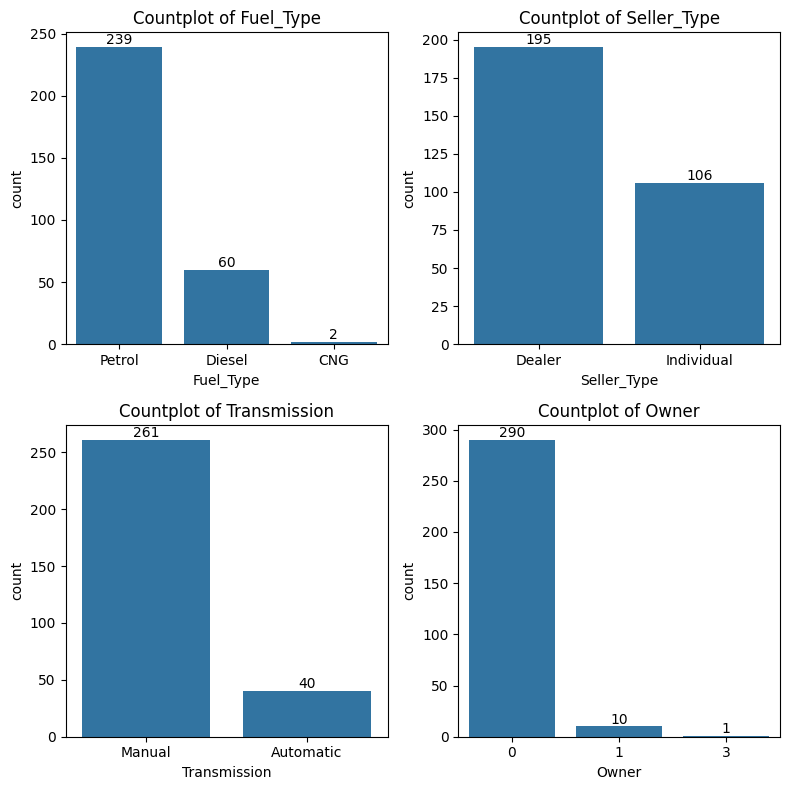

In [ ]:
#Univariate

# categorical columns
df_categorical = car_data[['Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

# Plot distributions of categorical features
fig, axes = plt.subplots(2, 2, figsize=(8, 8))

# Flatten the axes array to iterate through subplots correctly
axes = axes.flatten()

for i, col in enumerate(df_categorical.columns):
    sns.countplot(x=col, data=car_data, ax=axes[i])  # Pass the Axes object
    axes[i].set_title(f'Countplot of {col}')

    # Add counts on top of the bars
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}',
                         (p.get_x() + p.get_width() / 2., p.get_height()),
                         ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()

**Observations:** Most cars use Petrol, with far fewer Diesel and very few CNG. Dealers have listed more cars than individuals. Manual transmission dominates over automatic, and nearly all cars are first-hand.

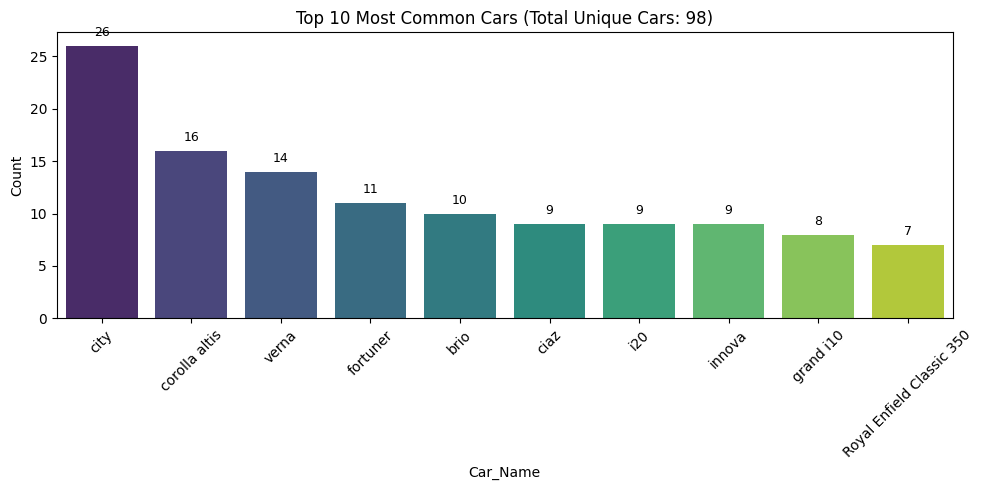

In [ ]:
# Get top 10 most common car names
plt.figure(figsize=(10, 5))
ax = sns.barplot(x=top_cars.index, y=top_cars.values, palette='viridis')
plt.title(f'Top 10 Most Common Cars (Total Unique Cars: {car_data["Car_Name"].nunique()})')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Add count labels
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()


**Observations:** The most frequently listed car in the dataset is the Maruti City, appearing 26 times, followed by models like the Corolla Altis (16), Verna (14), and Fortuner (11).


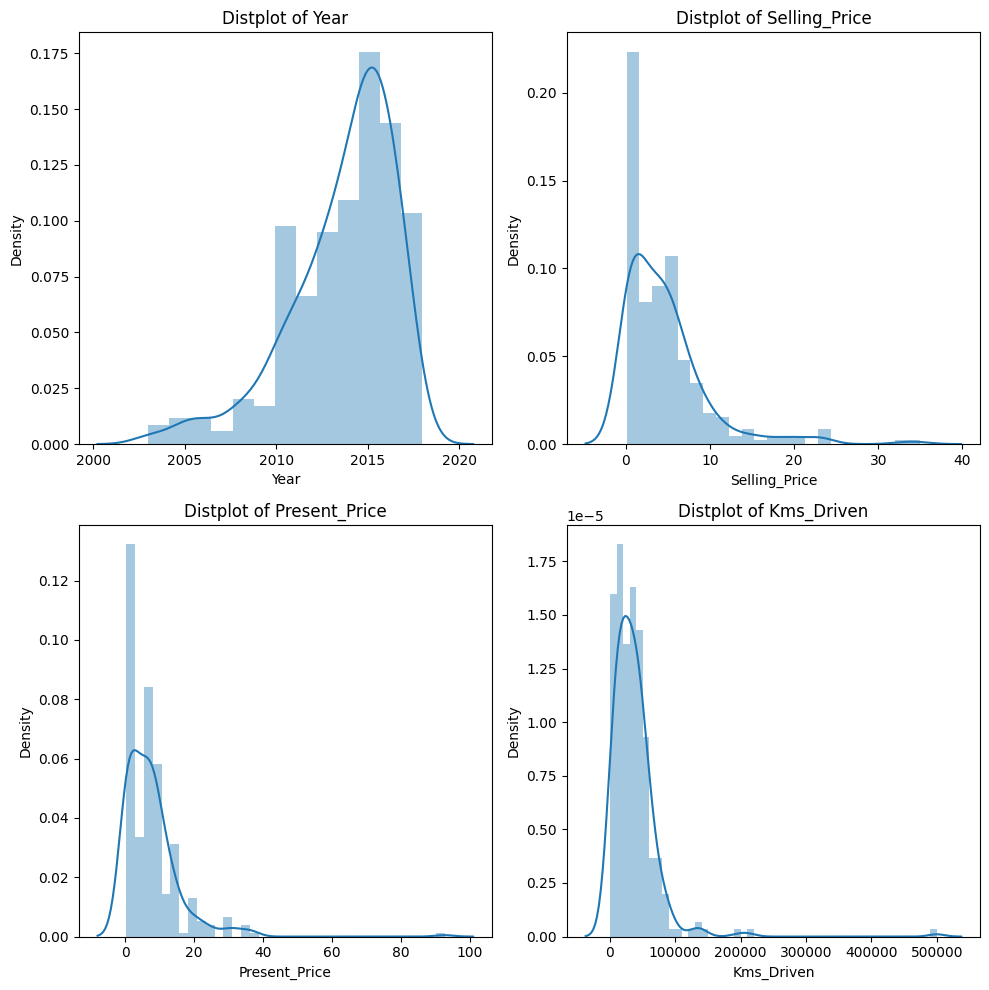

In [ ]:
df_numerical=car_data[['Year', 'Selling_Price', 'Present_Price', 'Kms_Driven']]

# Distributions of numerical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))
axes = axes.flatten()
for i, col in enumerate(df_numerical.columns):
    sns.distplot(df_numerical[col], ax=axes[i])
    axes[i].set_title(f'Distplot of {col}')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Observations:** Cars are mostly from 2010–2017, showing a focus on relatively new vehicles. Selling and present prices are right-skewed, with most cars priced low and a few high-end ones. Kms_driven also has a long tail, with some high-mileage outliers.

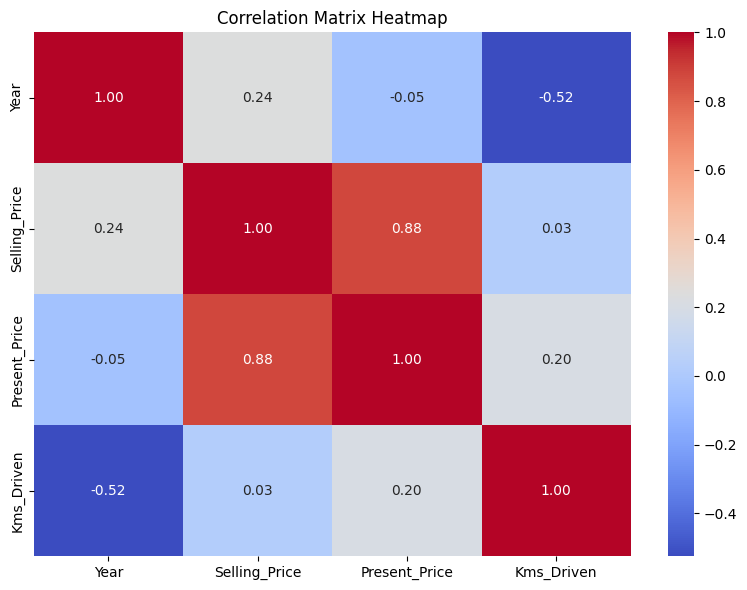

In [ ]:
correlation_matrix = df_numerical.corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


**Observations:** Present price has a strong positive correlation with selling price, and newer cars tend to sell for more. Kms driven has almost no effect on selling price but is negatively correlated with the car’s year, meaning older cars are driven more.

**Modelling and Evaluation**

In [ ]:
X=car_data.drop(['Car_Name','Selling_Price'],axis=1)
y=car_data['Selling_Price']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(240, 7)
(61, 7)


In [ ]:
# encode variables with ordinal encoding
encoder = ce.OrdinalEncoder(cols=['Fuel_Type','Seller_Type','Transmission'])
X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
184,2008,0.750,26000,1,1,1,1
132,2017,0.950,3500,1,1,1,0
194,2008,0.787,50000,1,1,1,0
75,2015,6.800,36000,1,2,1,0
111,2016,1.500,8700,1,1,1,0


In [ ]:
#Linear Regression
Lr_model=LinearRegression()
Lr_model.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Training data
Lr_train_pred=Lr_model.predict(X_train)
Lr_train_r2=r2_score(y_train,Lr_train_pred)
print('Training data R2 Score:',Lr_train_r2)
Lr_train_MSE=mean_squared_error(y_train,Lr_train_pred)
print('Training data MSE:',Lr_train_MSE)

Training data R2 Score: 0.8839793496750794
Training data MSE: 3.067244526278796


In [ ]:
#Testing data
Lr_pred=Lr_model.predict(X_test)
Lr_r2=r2_score(y_test,Lr_pred)
print('R2 Score:',Lr_r2)
Lr_MSE=mean_squared_error(y_test,Lr_pred)
print('MSE:',Lr_MSE)

R2 Score: 0.8468053957655811
MSE: 3.52892725389437


**Linear Regression** - After comparing the training and test results, the model demonstrates stable and reliable performance. The R² score on the training data is 0.884, while on the test data it slightly drops to 0.847 — a minimal difference that suggests good generalization. Similarly, the increase in MSE from 3.07 (training) to 3.53 (test) is small. Overall, this indicates that the model is not overfitting and performs consistently on unseen data.

In [ ]:
#Random Forest
RF_model=RandomForestRegressor()
RF_model.fit(X_train,y_train)
RF_predict=RF_model.predict(X_test)

R2 Score: 0.9634794024836374
MSE: 0.8412733108196723


In [ ]:
RF_train_pred=RF_model.predict(X_train)
RF_train_r2=r2_score(y_train,RF_train_pred)
print('Training data R2 Score:',RF_train_r2)
RF_train_MSE=mean_squared_error(y_train,RF_train_pred)
print('Training data MSE:',RF_train_MSE)

Training data R2 Score: 0.9855466522515227
Training data MSE: 0.3821039758333332


In [ ]:
RF_r2=r2_score(y_test,RF_predict)
print('R2 Score:',RF_r2)
RF_MSE=mean_squared_error(y_test,RF_predict)
print('MSE:',RF_MSE)

R2 Score: 0.9634794024836374
MSE: 0.8412733108196723


**Random Forest** - The model performs exceptionally well on both training and test datasets. With a training R² score of 0.986 and a test R² of 0.963, the drop is minimal, indicating strong generalization. While the MSE increases slightly from 0.38 to 0.84, it remains within an acceptable range. Overall, the model demonstrates high predictive accuracy and shows no signs of overfitting.

In [ ]:
#Lasso Regression
Lasso_model=Lasso()
Lasso_model.fit(X_train,y_train)
Lasso_predict=Lasso_model.predict(X_test)
r2_score=r2_score(y_test,Lasso_predict)
print('R2 Score:',r2_score)
Lasso_MSE=mean_squared_error(y_test,Lasso_predict)
print('MSE:',Lasso_MSE)

R2 Score: 0.798551246128469
MSE: 4.6404897963148
